In [2]:
import pandas as pd
import statsmodels.api as sm

map_m_to_q = {
    1 : 1, 2: 1, 3: 1, 4:2, 5: 2, 6: 2, 7: 3, 8:3 ,9:3, 10: 4, 11:4, 12:4
}
dir = "../data/"
cdf = pd.read_csv(dir+"data4columbia_credit.csv")
cdf.columns=['company','date','data']
cdf.date = pd.to_datetime(cdf.date)
cdf['month'] = cdf.date.apply(lambda x : x.month)
cdf['quarter'] = cdf.month.apply(lambda x : map_m_to_q[x])
cdf

,company,date,data,month,quarter
0,ef1bcca724f3,2016-01-01,266648.924500,1,1
1,ef1bcca724f3,2016-01-02,330109.961300,1,1
2,ef1bcca724f3,2016-01-03,248299.827200,1,1
3,ef1bcca724f3,2016-01-04,146428.339600,1,1
4,ef1bcca724f3,2016-01-05,146854.815500,1,1
...,...,...,...,...,...
116654,e2415cb7f63d,2022-11-05,1149.371612,11,4
116655,e2415cb7f63d,2022-11-06,890.458833,11,4
116656,e2415cb7f63d,2022-11-07,1233.454763,11,4
116657,e2415cb7f63d,2022-11-08,2478.464933,11,4


/Users/ethan/miniconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


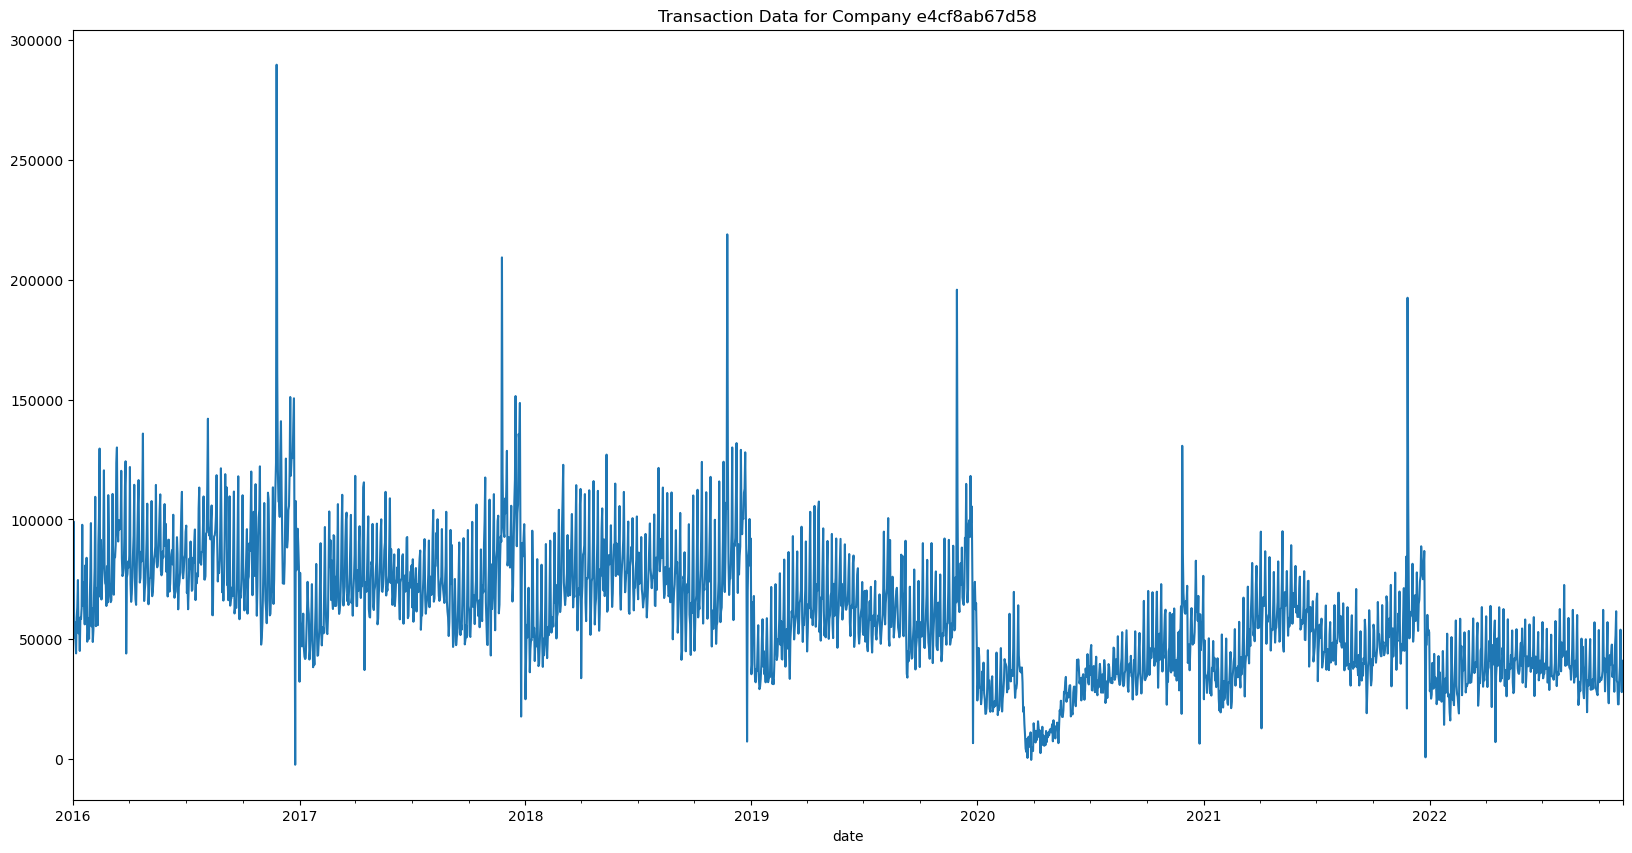

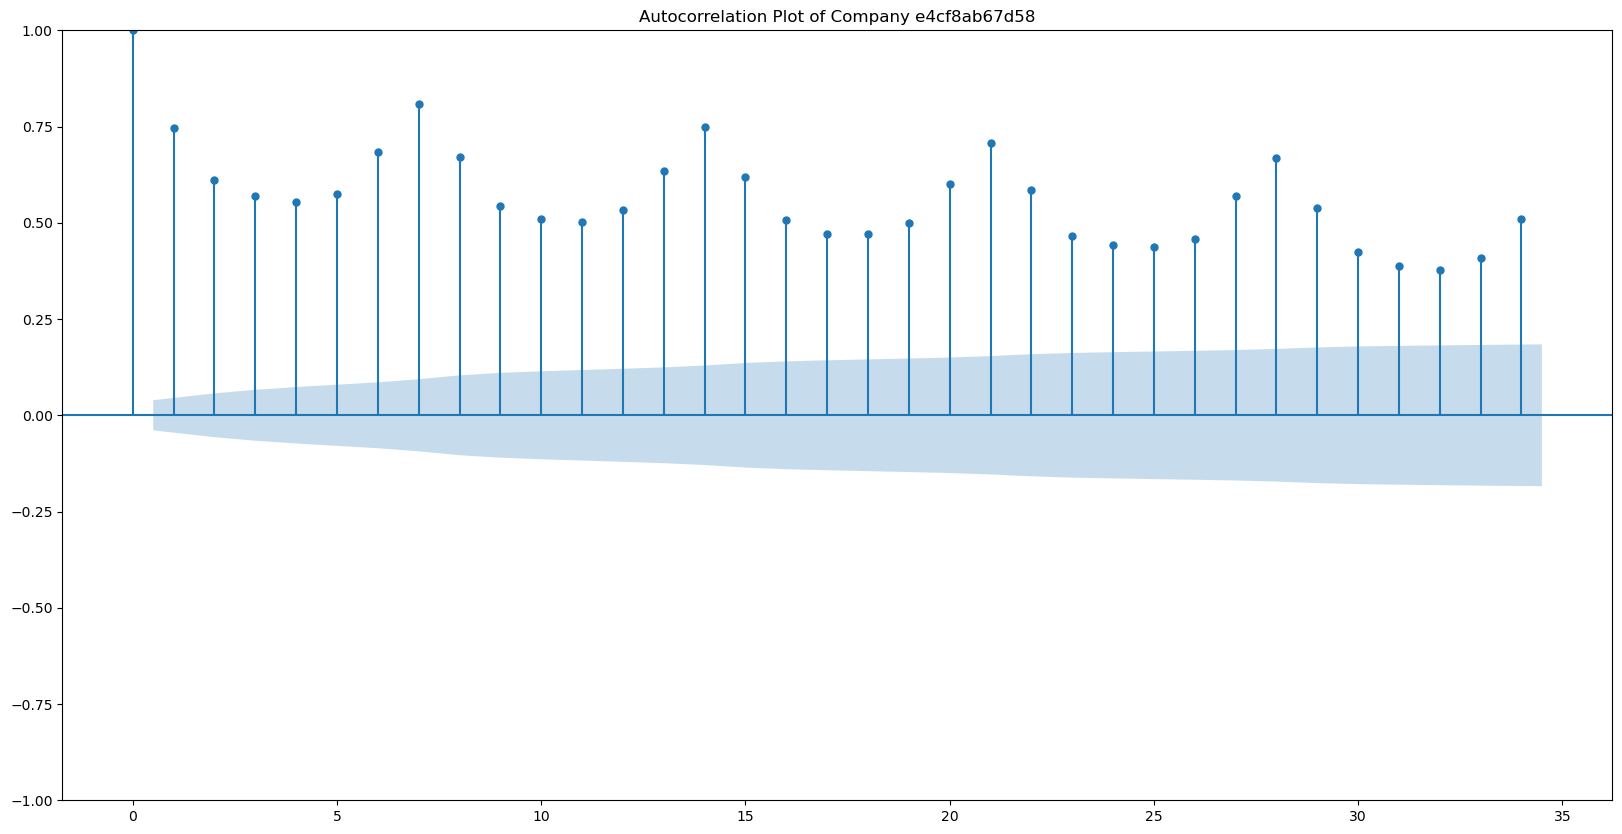

<Figure size 2000x1000 with 0 Axes>

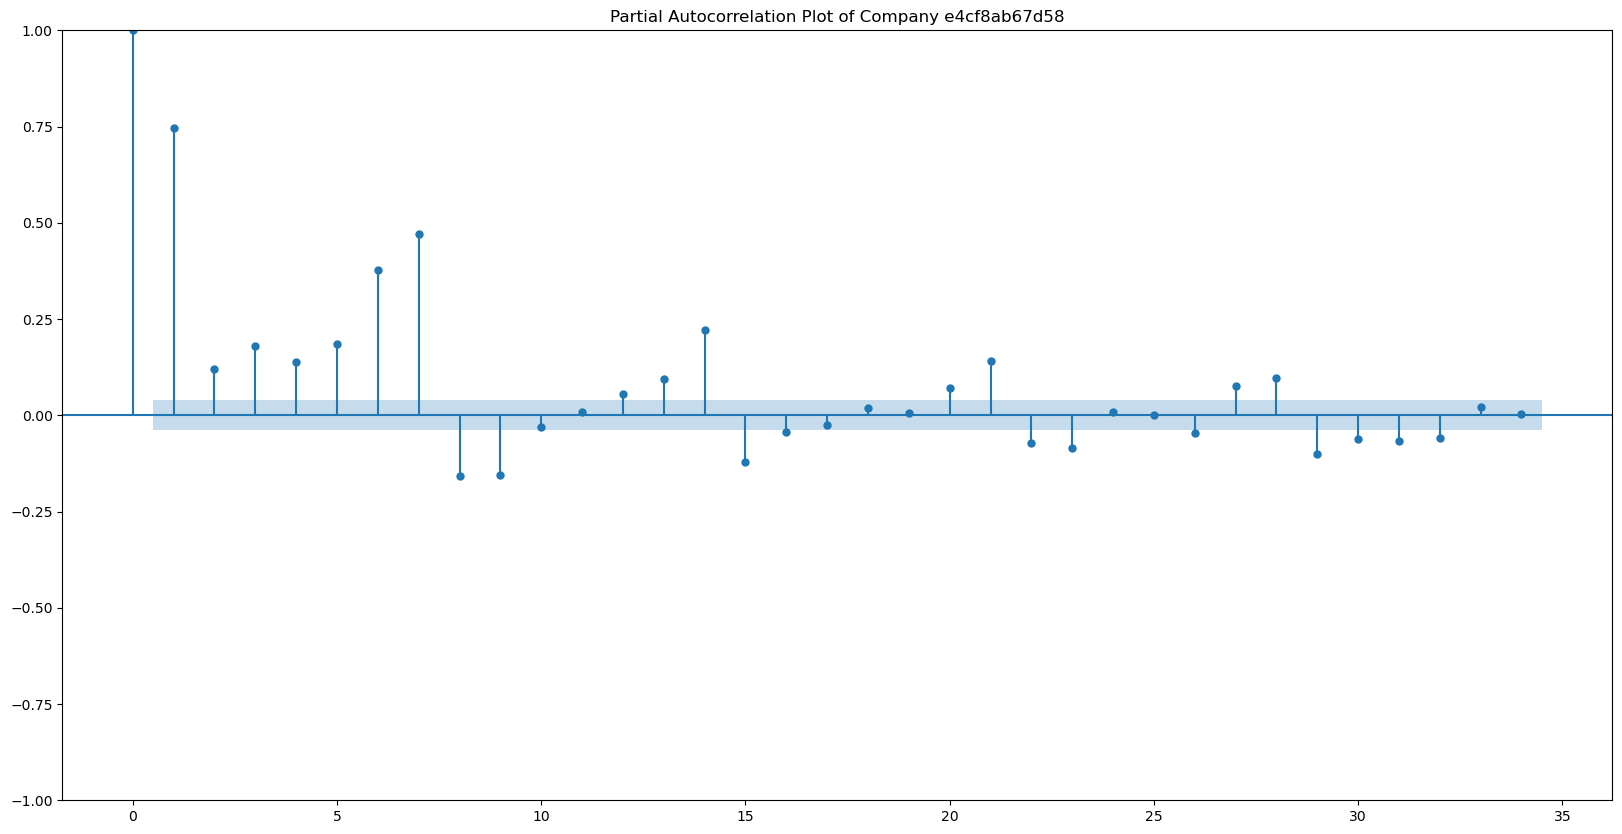

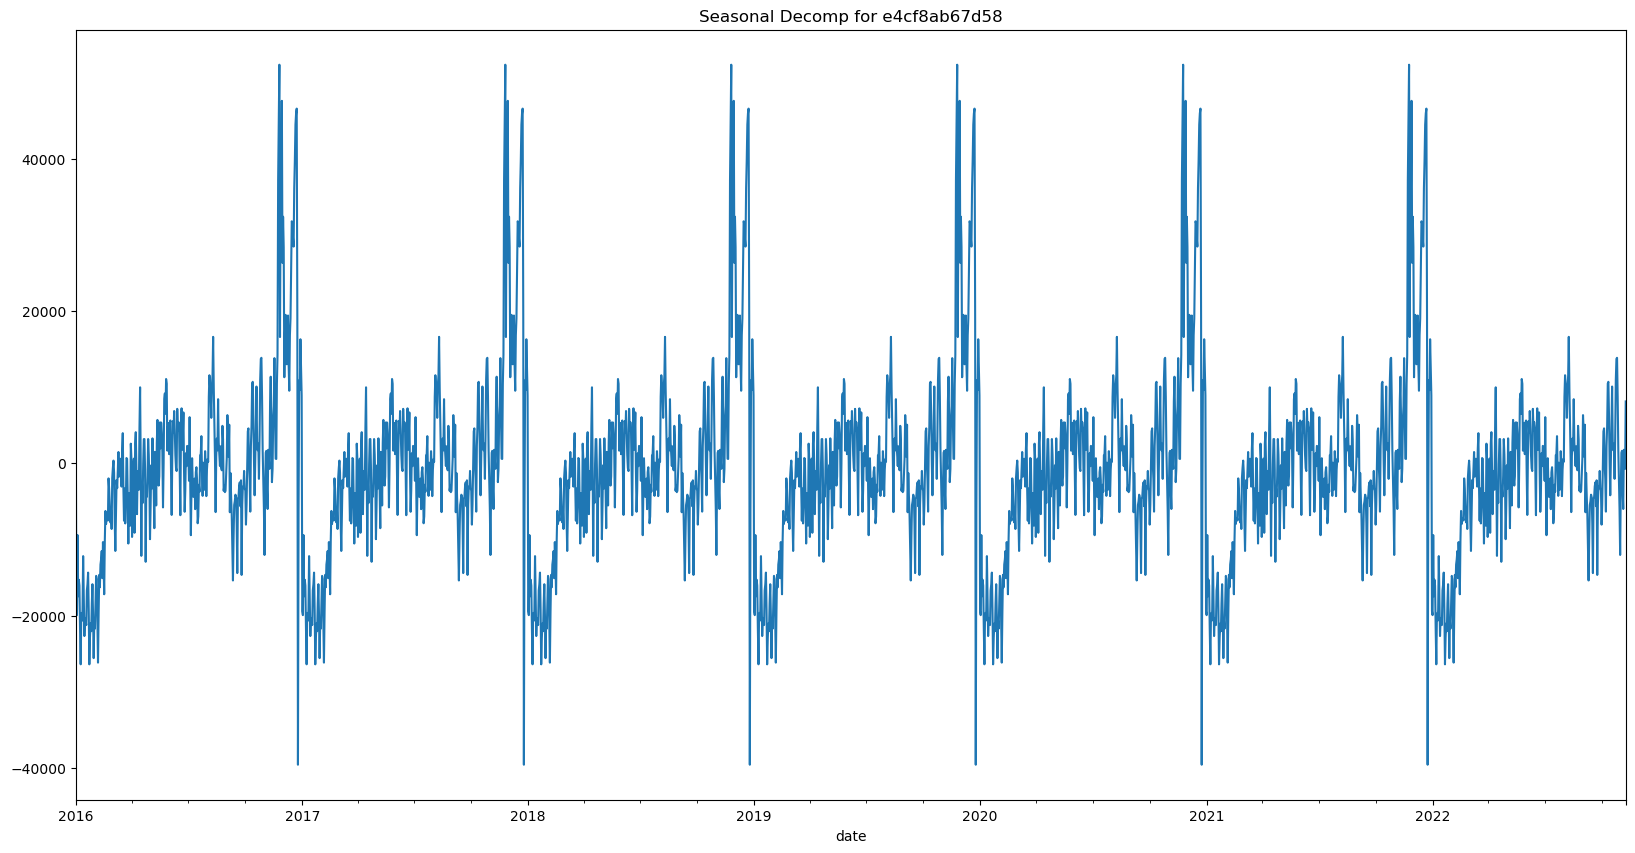

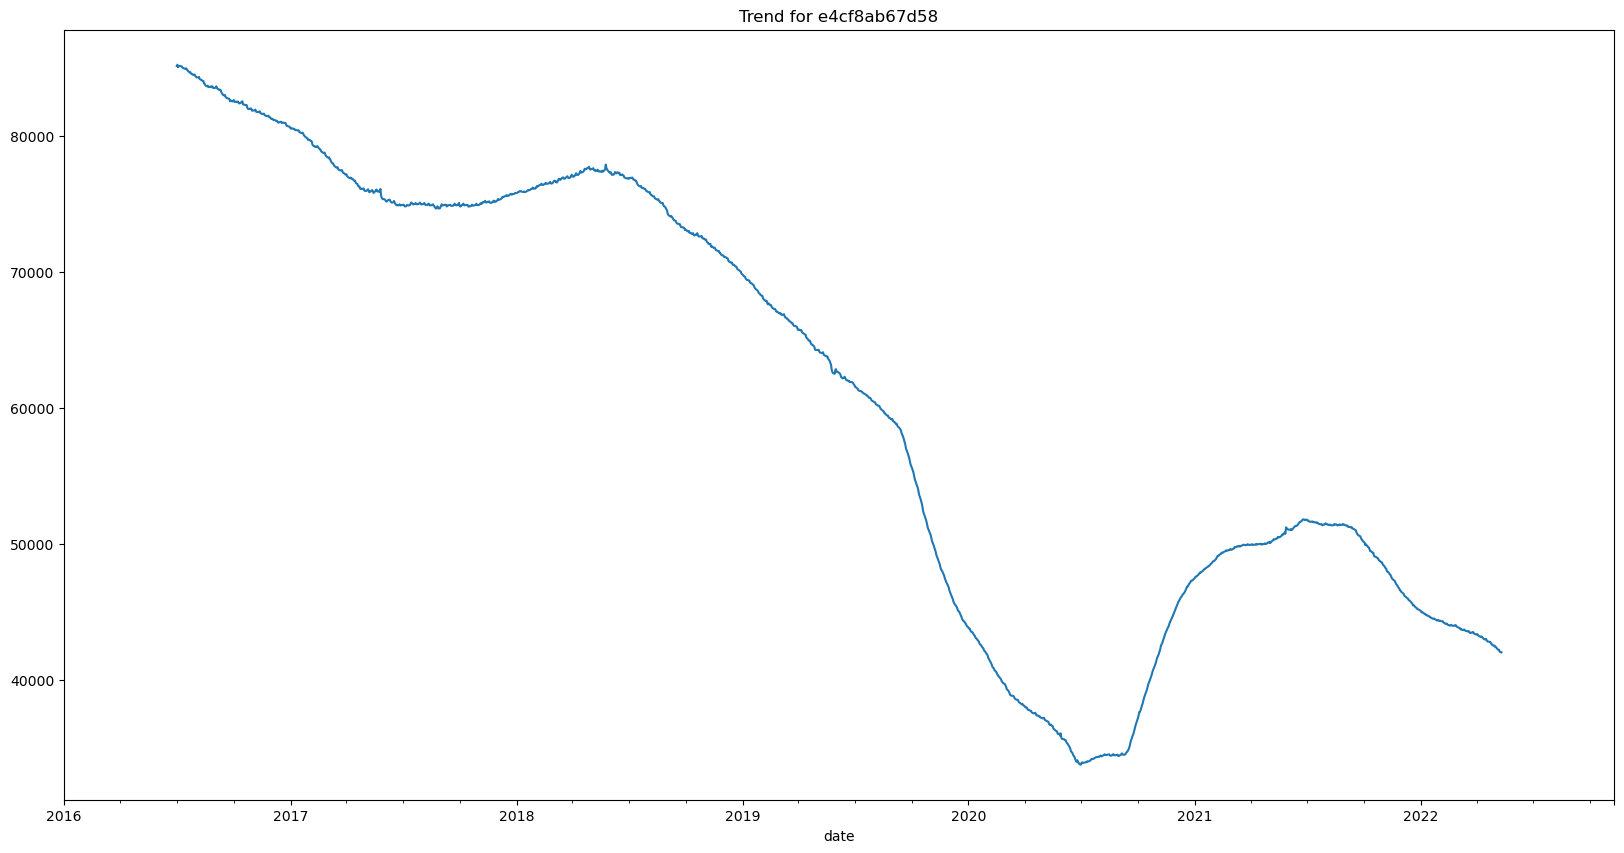

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

def run_decompose(cdf, company_id):
    data = cdf[cdf.company==cdf.company.unique()[company_id]].set_index('date')
    cid = data.company.iloc[0]
    data['data'].plot(title=f"Transaction Data for Company {cid}")
    sm.graphics.tsa.plot_acf(data['data'], title=f"Autocorrelation Plot of Company {cid}")
    plt.figure()
    sm.graphics.tsa.plot_pacf(data['data'], title=f"Partial Autocorrelation Plot of Company {cid}")
    plt.figure()
    seasonal_decompose(data['data'], period=365).seasonal.plot(title=f"Seasonal Decomp for {cid}")
    plt.figure()
    seasonal_decompose(data['data'], period=365).trend.plot(title=f"Trend for {cid}")

run_decompose(cdf, 2)

In [4]:
print(cdf.groupby('month')['data'].mean())

month
1     37221.201794
2     39499.614054
3     43218.483865
4     44889.556693
5     47185.668088
6     47377.974492
7     46744.543951
8     45455.191116
9     44862.898622
10    45289.020022
11    44450.557720
12    44811.584667
Name: data, dtype: float64


In [6]:
g = cdf.groupby('company')['data']
min_, max_ = g.transform('min'), g.transform('max')
cdf['data_scale'] = (cdf['data'] - min_) / (max_ - min_)
cdf

,company,date,data,month,quarter,data_scale
0,ef1bcca724f3,2016-01-01,266648.924500,1,1,0.298810
1,ef1bcca724f3,2016-01-02,330109.961300,1,1,0.375720
2,ef1bcca724f3,2016-01-03,248299.827200,1,1,0.276572
3,ef1bcca724f3,2016-01-04,146428.339600,1,1,0.153111
4,ef1bcca724f3,2016-01-05,146854.815500,1,1,0.153628
...,...,...,...,...,...,...
116654,e2415cb7f63d,2022-11-05,1149.371612,11,4,0.208974
116655,e2415cb7f63d,2022-11-06,890.458833,11,4,0.163990
116656,e2415cb7f63d,2022-11-07,1233.454763,11,4,0.223583
116657,e2415cb7f63d,2022-11-08,2478.464933,11,4,0.439893


In [7]:
print(cdf.groupby('month')['data_scale'].mean())

month
1     0.243158
2     0.257268
3     0.269286
4     0.270671
5     0.280576
6     0.287241
7     0.282683
8     0.277171
9     0.271123
10    0.265779
11    0.276234
12    0.290832
Name: data_scale, dtype: float64


<AxesSubplot: title={'center': 'Seasonal Decomp Trend'}, xlabel='date'>

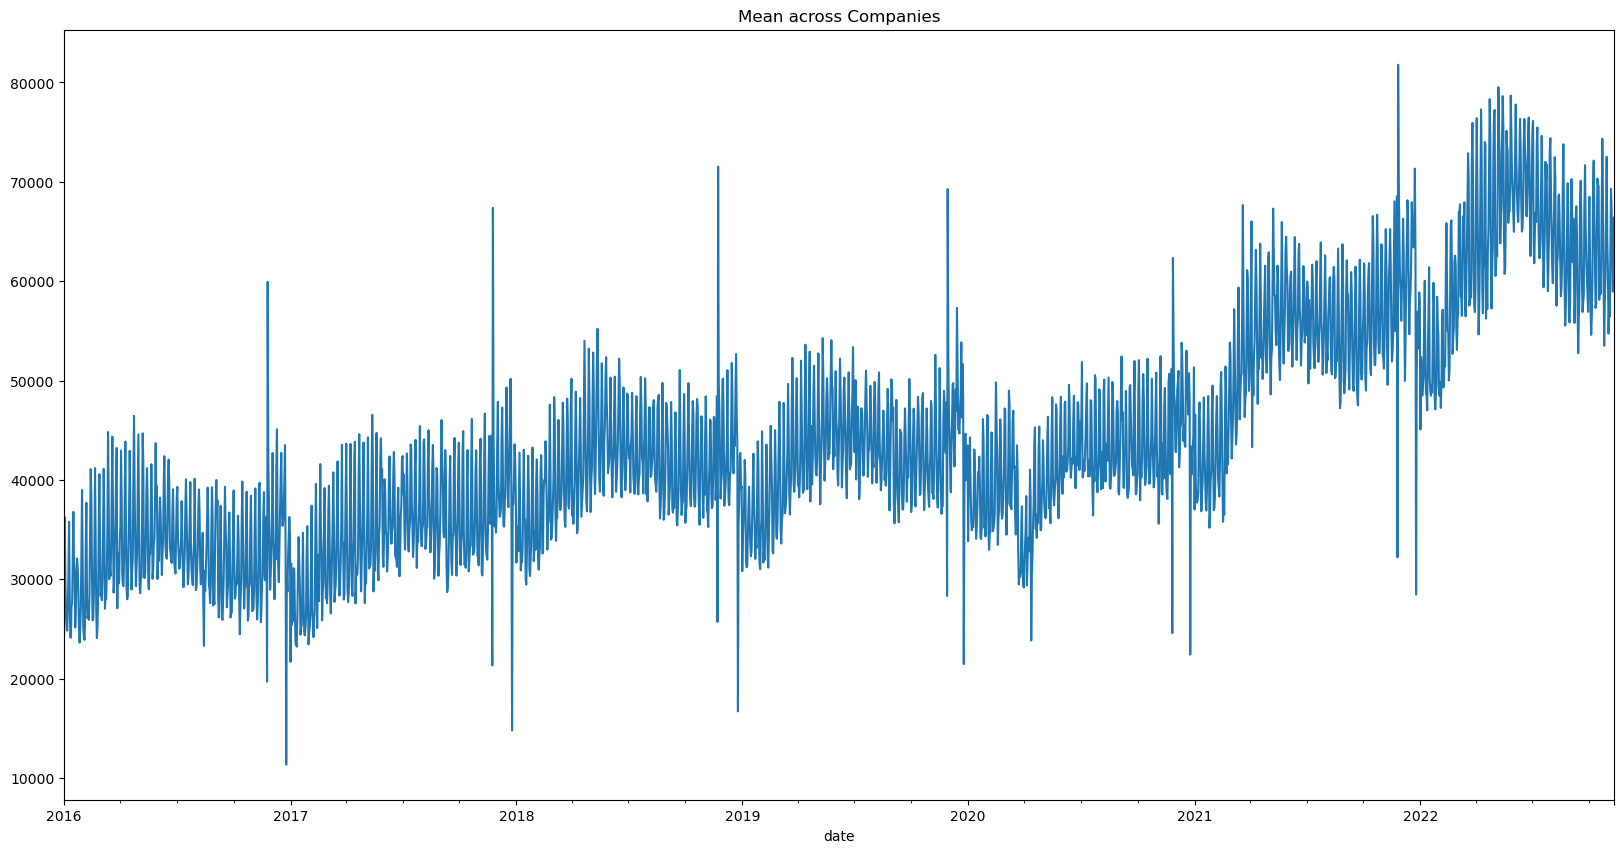

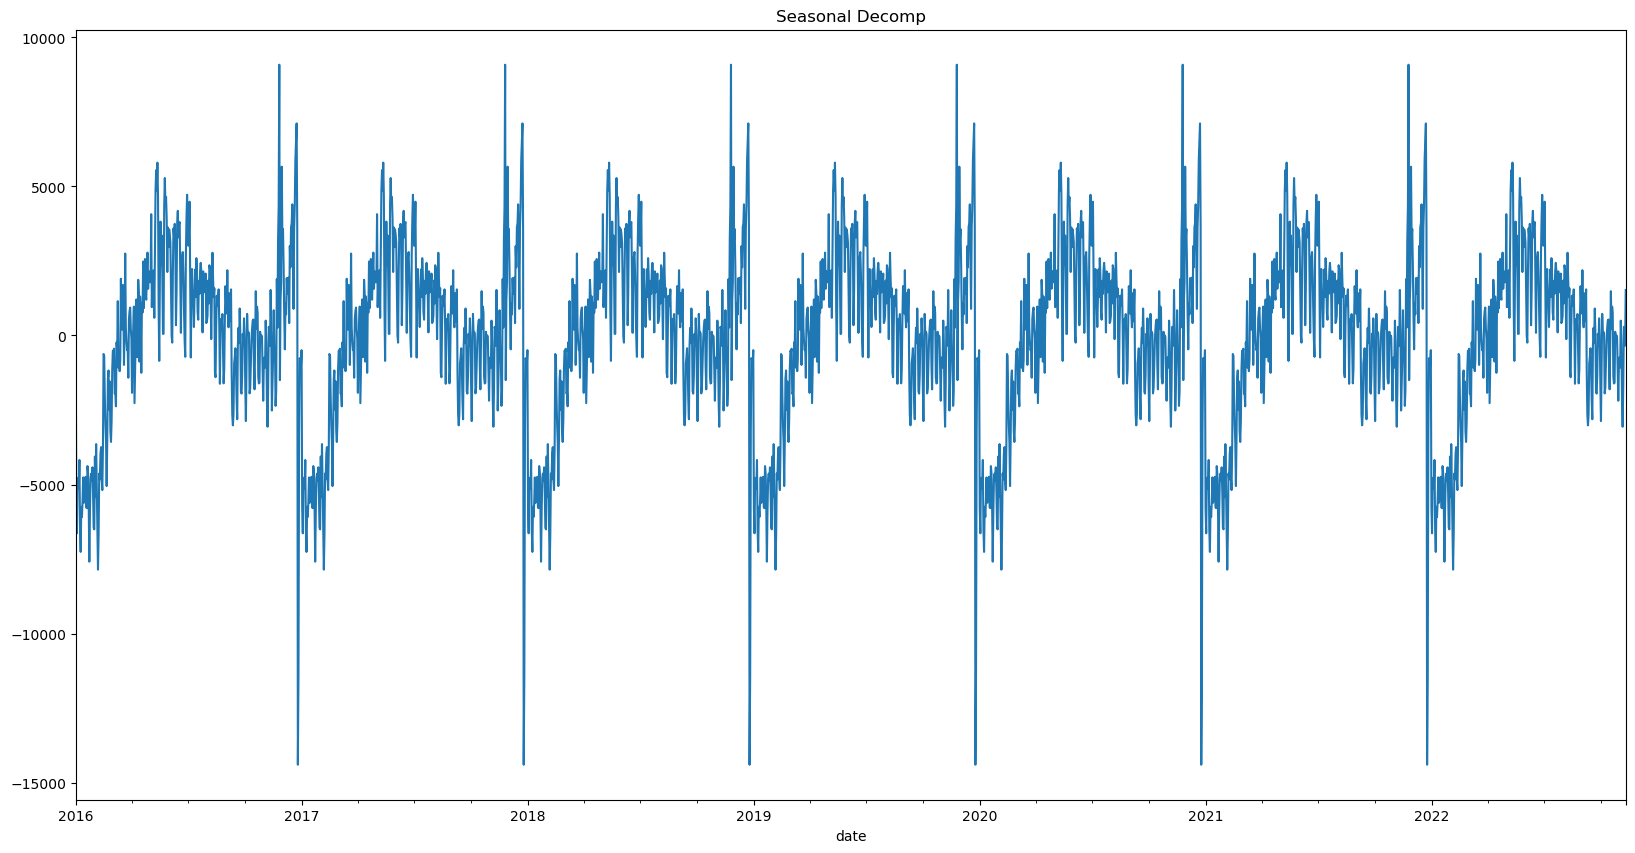

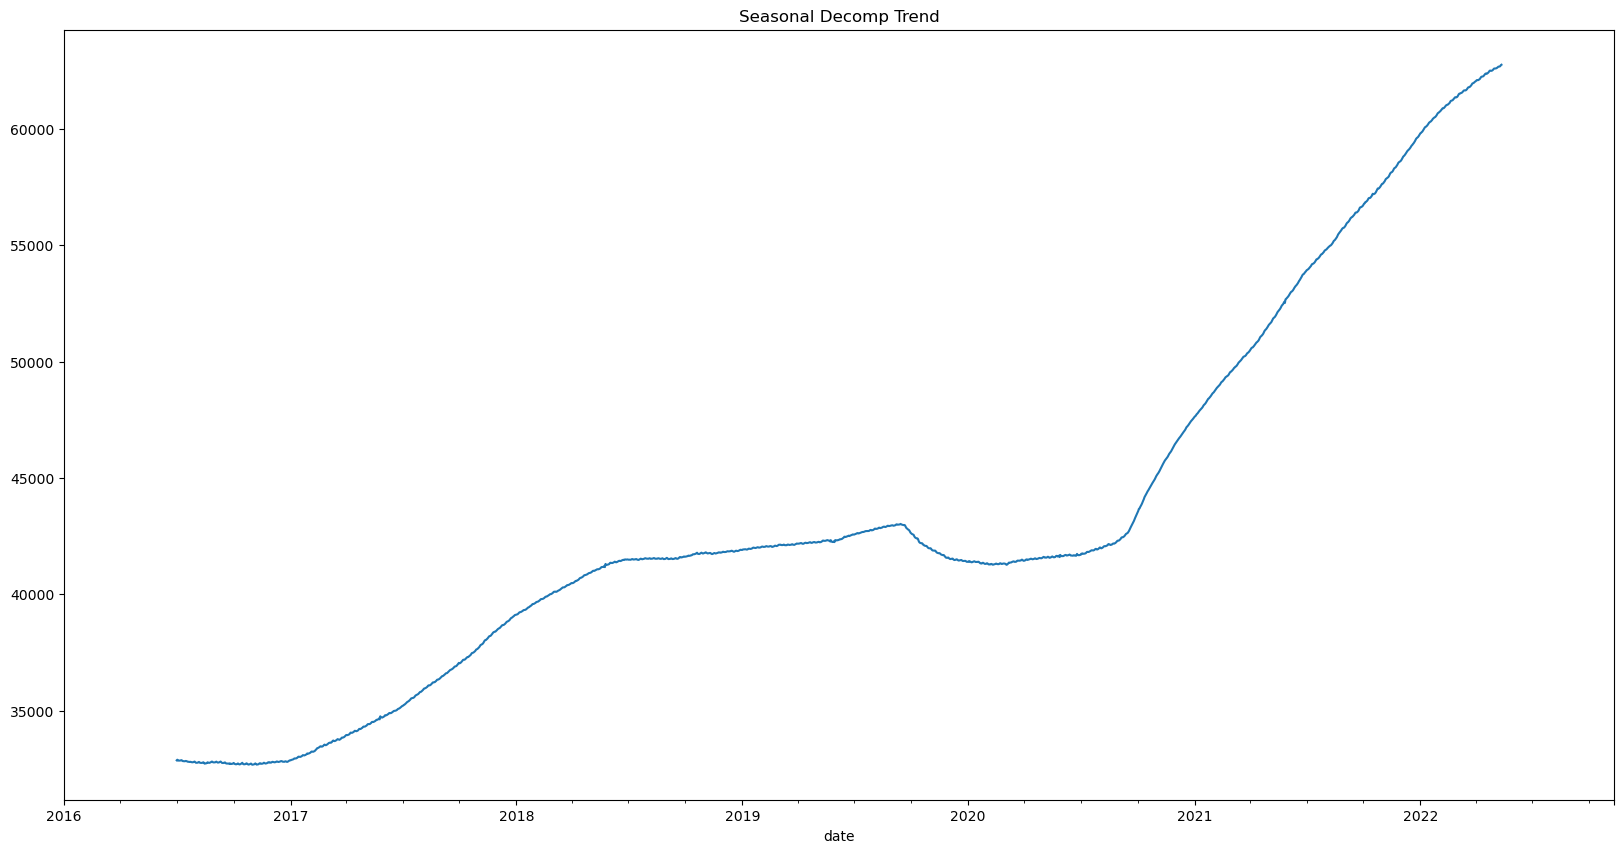

In [8]:
import numpy as np
gd = cdf.groupby(['date'])[['data']].mean()
gd.data.plot(title="Mean across Companies")
plt.figure()
seasonal_decompose(gd['data'], period=365).seasonal.plot(title="Seasonal Decomp")
plt.figure()
seasonal_decompose(gd['data'], period=365).trend.plot(title="Seasonal Decomp Trend")



<AxesSubplot: title={'center': 'Seasonal Decomp Trend'}, xlabel='date'>

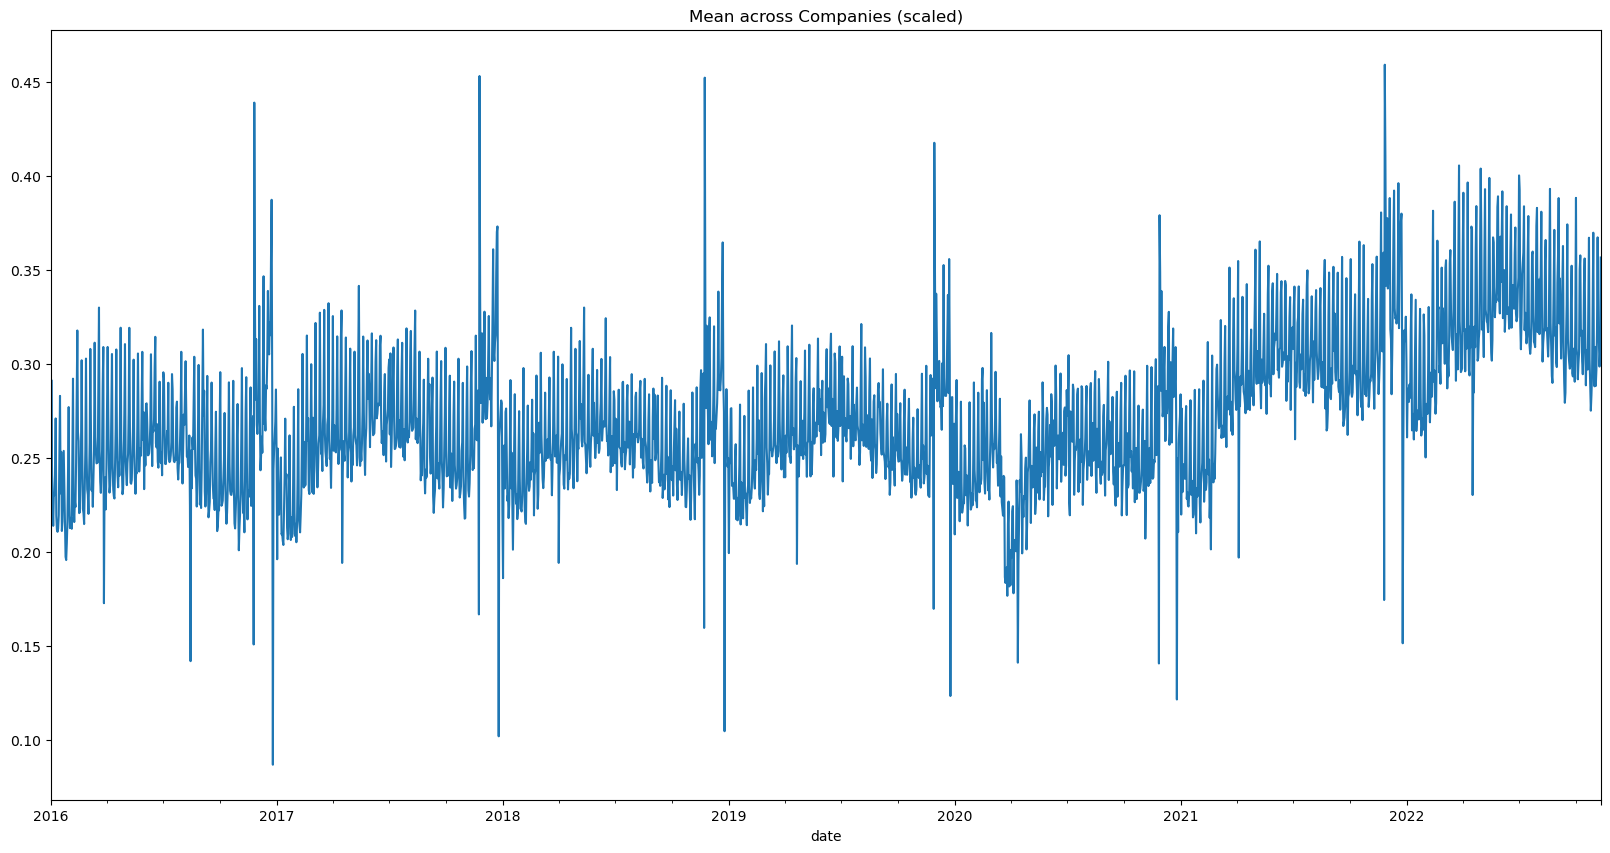

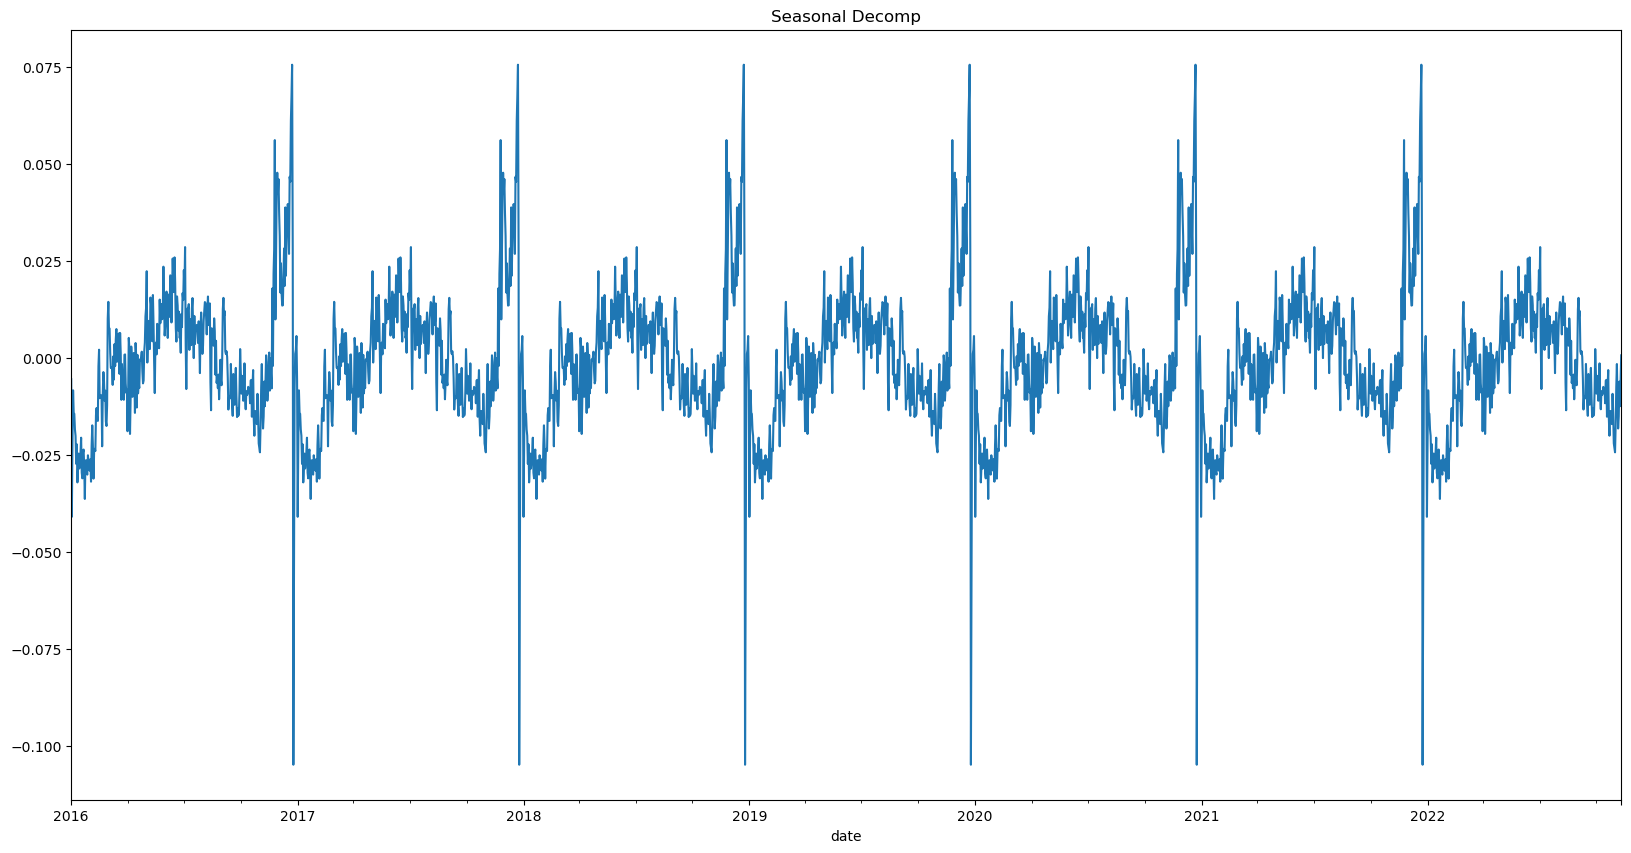

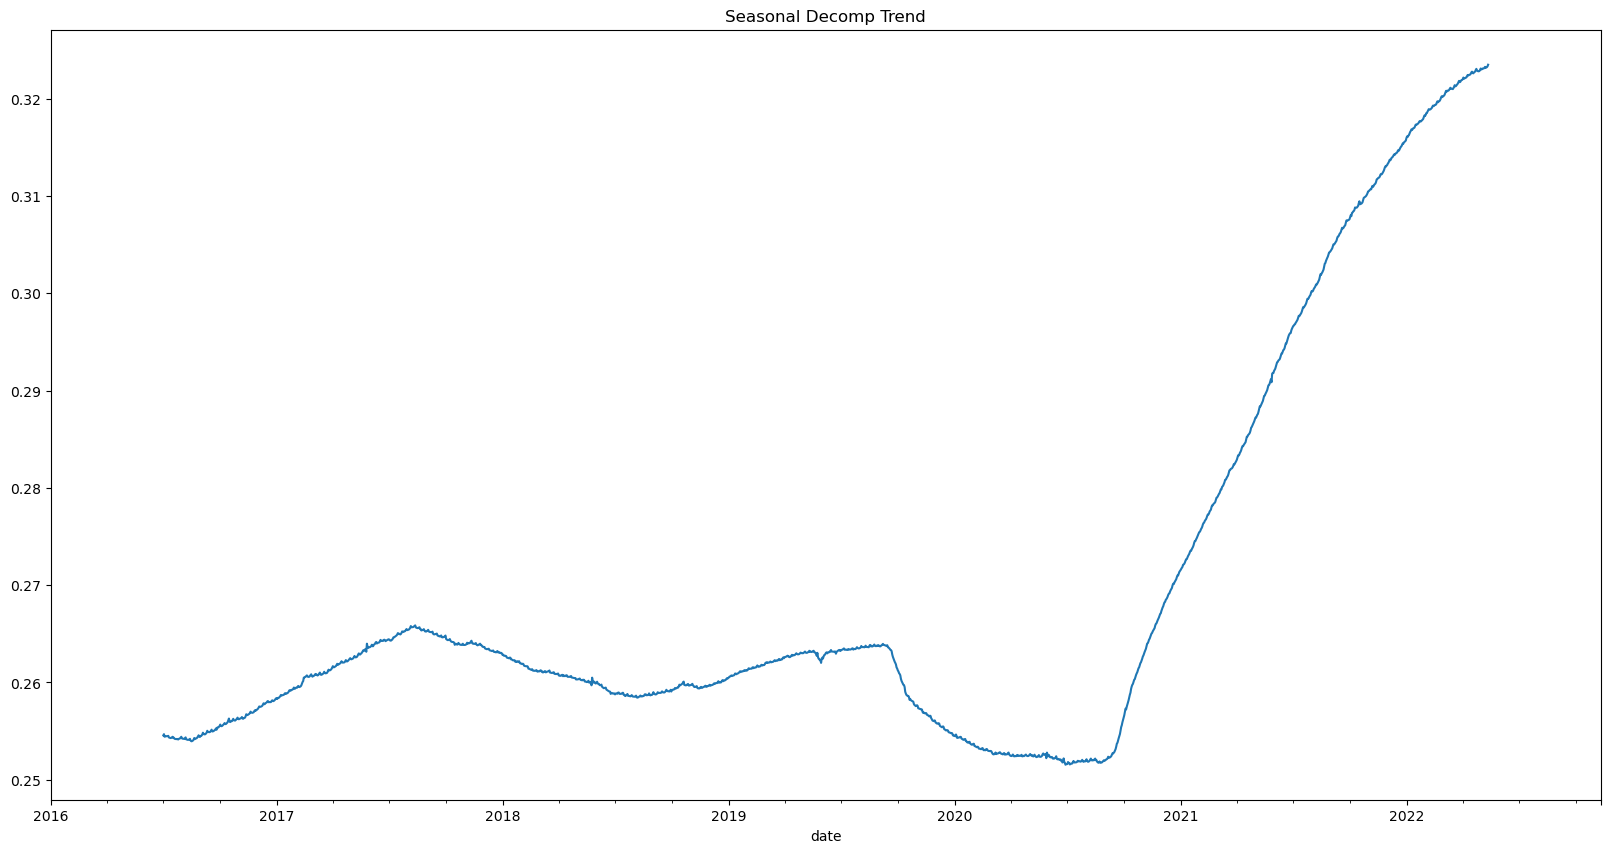

In [9]:
import numpy as np
gd = cdf.set_index('date').groupby(['date'])[['data_scale']].mean()
gd.data_scale.plot(title="Mean across Companies (scaled)")
plt.figure()
seasonal_decompose(gd['data_scale'], period=365).seasonal.plot(title="Seasonal Decomp")
plt.figure()
seasonal_decompose(gd['data_scale'], period=365).trend.plot(title="Seasonal Decomp Trend")



Text(0.5, 1.0, 'Histogram of Transactions By Company')

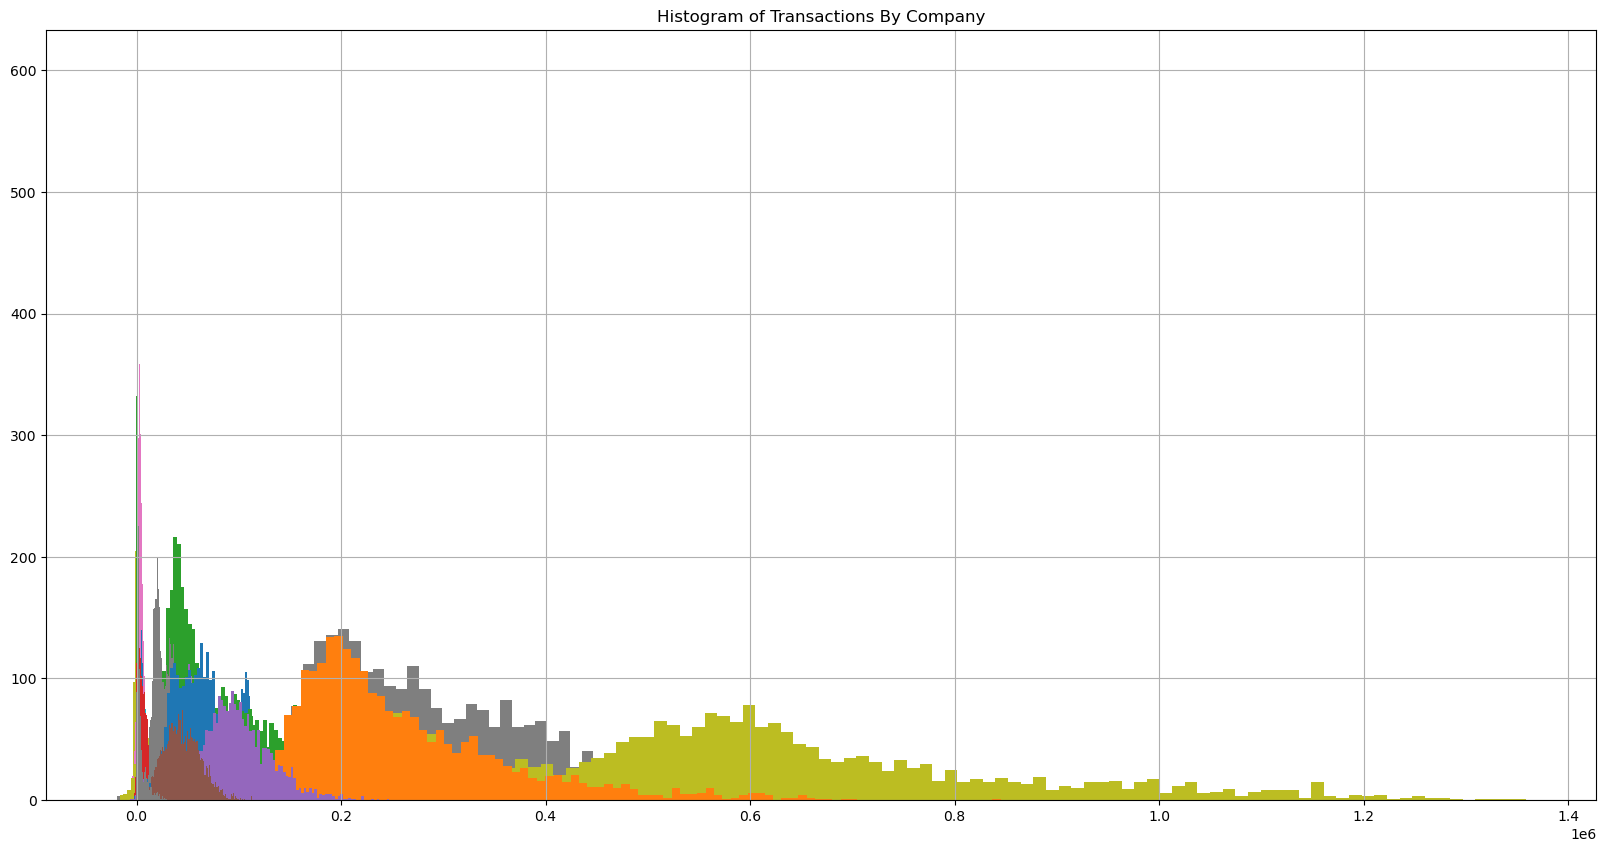

In [87]:
cdf.groupby('company').data.hist(bins=100)
plt.title("Histogram of Transactions By Company")

Text(0.5, 1.0, 'Histogram of Transactions By Company (Scaled)')

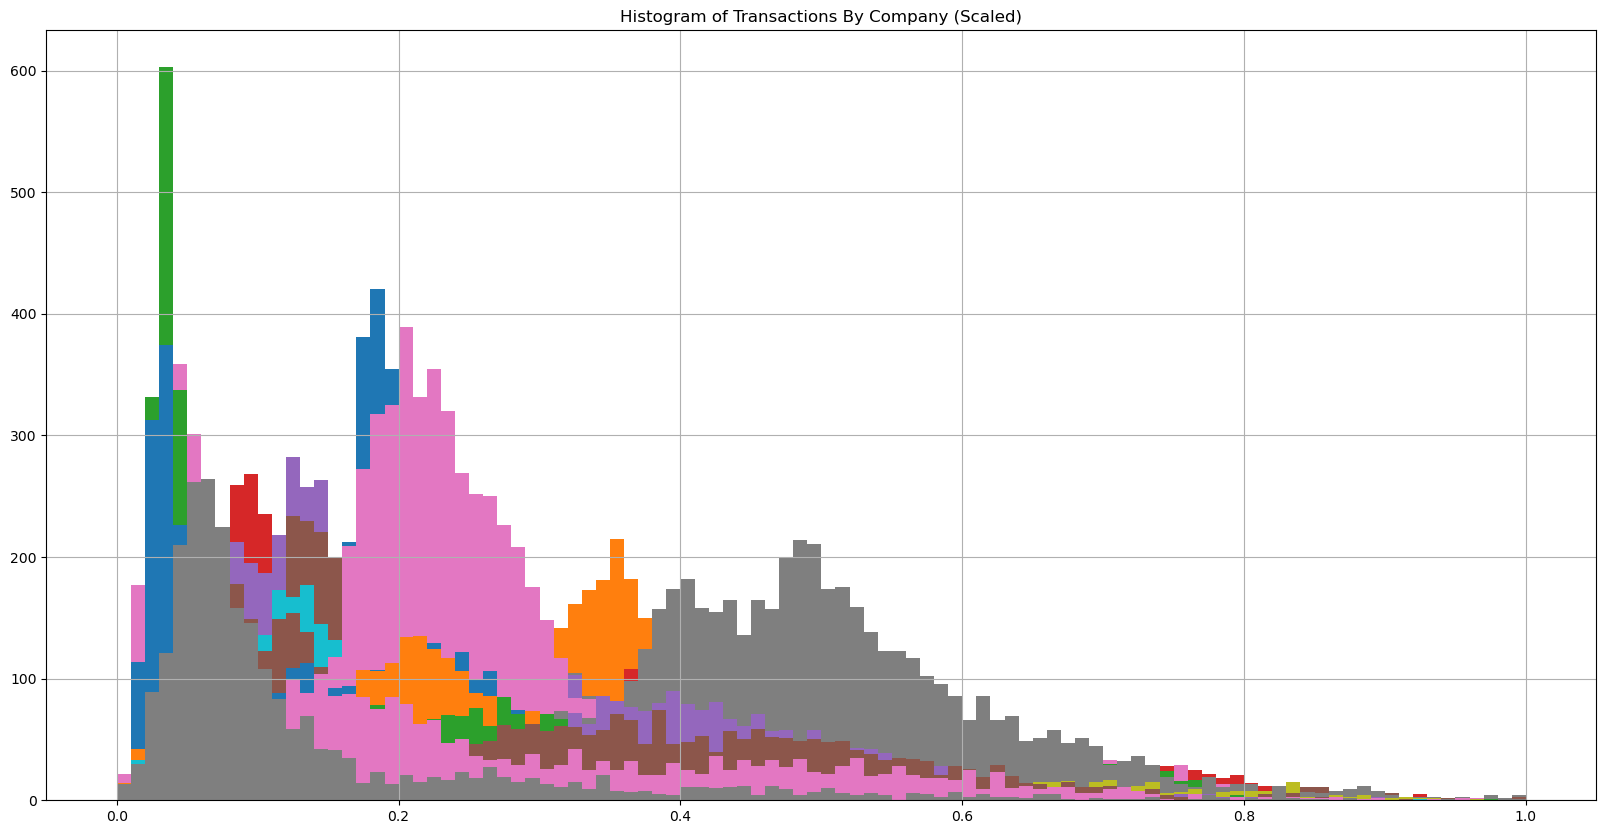

In [92]:
cdf.groupby('company').data_scale.hist(bins=100)
plt.title("Histogram of Transactions By Company (Scaled)")